### Hypothesis testing
#### Mini project II
Elements of Data Science

In [1]:
import numpy as np
from datascience import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

## Hypothesis Testing

#### Create differences Test statistic 


In [3]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

In [4]:
positive = np.count_nonzero(diff_n(make_array(1.0, 1.5,1.4, 1.2, 2.0, 1.8), 2)>0)
positive

3

In [5]:
negative = np.count_nonzero(diff_n(make_array(1.0, 1.5,1.4, 1.2, 2.0, 1.8), 2) < 0)
negative

1

In [6]:
positive - negative

2

In [7]:
def changes(rates, years = 1):
    "Return the number of increases minus the number of decreases after two years."
    differences = diff_n(rates, years)  
    positives = np.count_nonzero(differences > 0)
    negatives = np.count_nonzero(differences < 0) 
    return positives - negatives  

### Inference and biodiversity recovery

In [10]:
# Plot description dataset
# For the project, you will pick two plot codes
# This first file has important metadata about the plots
datafile = "../../Mini Project II/data/MSH_PLOT_DESCRIPTORS2.csv"
MSH_PLOT = Table.read_table(datafile)
MSH_PLOT

PLOT_NAME,PLOT_CODE,FIRST_YEAR,LAST_YEAR,UTMGRID,UTMEAST,UTMNORTH,LONG,LAT,POT._RAD.,HEAT_LOAD,ELEVATION(M),ASPECT,SLOPE,IMPACT_TYPE,SUCCESSION_TYPE
Toutle Ridge10,TORD10,1981,1996,10T,559724,5118180,122.226,46.2146,0.769,0.796,1430,N,11,Blast edge,Secondary
Toutle Ridge09,TORD09,1981,1997,10T,559599,5118216,122.227,46.2149,0.722,0.827,1417,NW,18,Blast edge,Secondary
Toutle Ridge08,TORD08,1981,1997,10T,559565,5118281,122.228,46.2155,0.788,0.833,1401,NNW,10,Blast edge,Secondary
Toutle Ridge07,TORD07,1981,1997,10T,559466,5118302,122.229,46.2157,0.756,0.786,1379,N,12,Blast edge,Secondary
Toutle Ridge06,TORD06,1981,1997,10T,559413,5118329,122.23,46.2159,0.835,0.877,1365,NW,7,Blast edge,Secondary
Toutle Ridge05,TORD05,1981,1997,10T,559342,5118366,122.231,46.2163,0.822,0.854,1352,NNW,7,Blast edge,Secondary
Toutle Ridge04,TORD04,1981,1997,10T,559279,5115125,122.232,46.1871,0.764,0.818,1340,NNW,12,Blast edge,Secondary
Toutle Ridge03,TORD03,1981,1997,10T,559238,5118483,122.232,46.2173,0.764,0.818,1320,NNW,12,Blast edge,Secondary
Toutle Ridge02,TORD02,1981,1997,10T,559091,5118480,122.234,46.2173,0.861,0.9,1294,WNW,6,Blast edge,Secondary
Toutle Ridge01,TORD01,1981,1997,10T,558992,5118569,122.235,46.2181,0.874,0.9,1280,WNW,4,Blast edge,Secondary


In [ ]:
np.unique(MSH_PLOT['PLOT_CODE'])

In [ ]:
MSH_PLOT = MSH_PLOT.with_columns('NLONG',-1*(MSH_PLOT.column('LONG')))
MSH_map = MSH_PLOT.select('LAT', 'NLONG', 'PLOT_CODE').relabel('PLOT_CODE', 'labels')
Circle.map_table(MSH_map, color='blue',area=200)

## How can we join these data sets? 

In [11]:
# Load plot data by year
datafile = "../../Mini Project II/data/MSH_STRUCTURE_PLOT_YEAR.csv"
MSH_YEAR = Table.read_table(datafile)
MSH_YEAR.show(3)

PLOT_ID,PLOT_NAME,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY
ABPL011995,ABPL,1,1995,14,2.2,2.41,0.913,7.7
ABPL011996,ABPL,1,1996,17,2.9,2.524,0.891,8.1
ABPL011997,ABPL,1,1997,18,4.2,2.231,0.772,11.6


In [14]:
MSH_PLOT.show(3)

PLOT_NAME,PLOT_CODE,FIRST_YEAR,LAST_YEAR,UTMGRID,UTMEAST,UTMNORTH,LONG,LAT,POT._RAD.,HEAT_LOAD,ELEVATION(M),ASPECT,SLOPE,IMPACT_TYPE,SUCCESSION_TYPE
Toutle Ridge10,TORD10,1981,1996,10T,559724,5118180,122.226,46.2146,0.769,0.796,1430,N,11,Blast edge,Secondary
Toutle Ridge09,TORD09,1981,1997,10T,559599,5118216,122.227,46.2149,0.722,0.827,1417,NW,18,Blast edge,Secondary
Toutle Ridge08,TORD08,1981,1997,10T,559565,5118281,122.228,46.2155,0.788,0.833,1401,NNW,10,Blast edge,Secondary


In [15]:
test = 'ABPL011995'
test[0:6]

'ABPL01'

In [18]:
# This function is equivalent to the lambda function above.
def chop_six(str):
    return str[0:6]

chop_six("What are the first six characters of this string?")

'What a'

In [19]:
MSH_YEAR = MSH_YEAR.with_column('PLOT_CODE',MSH_YEAR.apply(chop_six, 'PLOT_ID'))
MSH_YEAR.show(3)

PLOT_ID,PLOT_NAME,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY,PLOT_CODE
ABPL011995,ABPL,1,1995,14,2.2,2.41,0.913,7.7,ABPL01
ABPL011996,ABPL,1,1996,17,2.9,2.524,0.891,8.1,ABPL01
ABPL011997,ABPL,1,1997,18,4.2,2.231,0.772,11.6,ABPL01


In [20]:
# Join the two datatables on their common feature
volcano = MSH_PLOT.join('PLOT_CODE', MSH_YEAR, 'PLOT_CODE')
volcano.show(3)

PLOT_CODE,PLOT_NAME,FIRST_YEAR,LAST_YEAR,UTMGRID,UTMEAST,UTMNORTH,LONG,LAT,POT._RAD.,HEAT_LOAD,ELEVATION(M),ASPECT,SLOPE,IMPACT_TYPE,SUCCESSION_TYPE,PLOT_ID,PLOT_NAME_2,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY
ABPL01,Abraham Plain01,1995,2009,10T,566370,5118007,122.14,46.2124,0.893,0.881,1365,E,2,Blast; Scour; Pumice,Primary,ABPL011995,ABPL,1,1995,14,2.2,2.41,0.913,7.7
ABPL01,Abraham Plain01,1995,2009,10T,566370,5118007,122.14,46.2124,0.893,0.881,1365,E,2,Blast; Scour; Pumice,Primary,ABPL011996,ABPL,1,1996,17,2.9,2.524,0.891,8.1
ABPL01,Abraham Plain01,1995,2009,10T,566370,5118007,122.14,46.2124,0.893,0.881,1365,E,2,Blast; Scour; Pumice,Primary,ABPL011997,ABPL,1,1997,18,4.2,2.231,0.772,11.6


In [21]:
np.unique(volcano['IMPACT_TYPE'])

array(['Blast', 'Blast edge', 'Blast; Scour; Pumice', 'Blast; pumice',
       'Lahar-thick deposit', 'Scour-Mild',
       'Scour-intense; Moderate deposit', 'Scour-moderate; Thin deposit',
       'Tephra', 'Weak blast; tephra'],
      dtype='<U31')

1. Create initial data tables and plots to explore the nature of the different plots included in "data/MSH_PLOT_DESCRIPTORS2.csv". Variables to consider include elevation, slope, aspect (direction), impact type. You could use group or pivot methods here.

2. Identify two PLOT_CODEs to study based on mapped location and characteristics given in "data/MSH_PLOT_DESCRIPTORS2.csv" file. Use a markdown cell to provide reasons for your two choices of plots. Include differences and similarities.

3. Carry out exploratory data analysis on the yearly data included in "data/MSH_STRUCTURE_PLOT_YEAR.csv" for each of the identified plots.

## Some example data exploration
### Richness vs. aspect -- a decade of change

In [22]:
np.unique(volcano['FIRST_YEAR'])

array([1980, 1981, 1982, 1984, 1989, 1995])

In [23]:
np.unique(volcano['LAST_YEAR'])

array([1980, 1990, 1996, 1998, 2005, 2008, 2009])

In [24]:
before = volcano.where('YEAR', 1990)
after = volcano.where('YEAR', 2000)

before.select('ASPECT', 'RICHNESS', 'COVER_%').group('ASPECT')

ASPECT,count
E,2
ENE,2
ESE,5
N,3
N,5
NE,9
NNE,3
NW,12
S,2
SE,3


In [25]:
after.select('ASPECT', 'RICHNESS', 'COVER_%').group('ASPECT')

ASPECT,count
E,11
ESE,3
N,2
N,4
NE,9
NNE,2
NW,12
S,2
SE,3
SSW,1


## There is always a data cleaning issue!
There direction north is sometime encoded as 'N' and sometimes as 'N '

In [26]:
np.unique(volcano['ASPECT'])

array(['E', 'ENE', 'ESE', 'N', 'N ', 'NE', 'NNE', 'NW', 'S', 'SE', 'SSW',
       'SW', 'W', 'WSW'],
      dtype='<U3')

In [28]:
# Fix the problem
aspect = volcano.column('ASPECT')
aspect[np.nonzero(aspect == 'N ')] = 'N'
volcano = volcano.with_columns('ASPECT', aspect)

before = volcano.where('YEAR', 1990)
after = volcano.where('YEAR', 2000)

before.select('ASPECT', 'RICHNESS', 'COVER_%').group('ASPECT')

ASPECT,count
E,2
ENE,2
ESE,5
N,8
NE,9
NNE,3
NW,12
S,2
SE,3
SSW,2


In [29]:
after.select('ASPECT', 'RICHNESS', 'COVER_%').group('ASPECT')

ASPECT,count
E,11
ESE,3
N,6
NE,9
NNE,2
NW,12
S,2
SE,3
SSW,1
SW,2


In [30]:
before.select('ASPECT', 'RICHNESS', 'COVER_%').group('ASPECT', np.median)

ASPECT,RICHNESS median,COVER_% median
E,9.5,22.05
ENE,20,72.85
ESE,11,19.5
N,7,1
NE,5,0.5
NNE,7,0.7
NW,6.5,0.75
S,18.5,33.05
SE,13,27.7
SSW,20,40.9


In [31]:
after.select('ASPECT', 'RICHNESS', 'COVER_%').group('ASPECT', np.median)

ASPECT,RICHNESS median,COVER_% median
E,17,6.1
ESE,12,28.8
N,18,47.3
NE,19,3.5
NNE,20.5,35.05
NW,19.5,7.05
S,20.5,35.2
SE,16,40.6
SSW,19,52.2
SW,19.5,39.2


In [32]:
before = before.select('ASPECT', 'RICHNESS')
after = after.select('ASPECT', 'RICHNESS')
before.join('ASPECT', after, 'ASPECT').group('ASPECT', np.median)

ASPECT,RICHNESS median,RICHNESS_2 median
E,9.5,17
ESE,11,12
N,7,18
NE,5,19
NNE,7,20.5
NW,6.5,19.5
S,18.5,20.5
SE,13,16
SSW,20,19
SW,20,19.5


# Let's look at some trends

In [33]:
np.unique(MSH_YEAR['PLOT_NAME'])

array(['ABPL', 'BUCA', 'BUCB', 'BUCC', 'BUCD', 'LAHR', 'PICA', 'PICB',
       'PICE', 'PUPL', 'SFTR', 'STRD', 'TORD'],
      dtype='<U4')

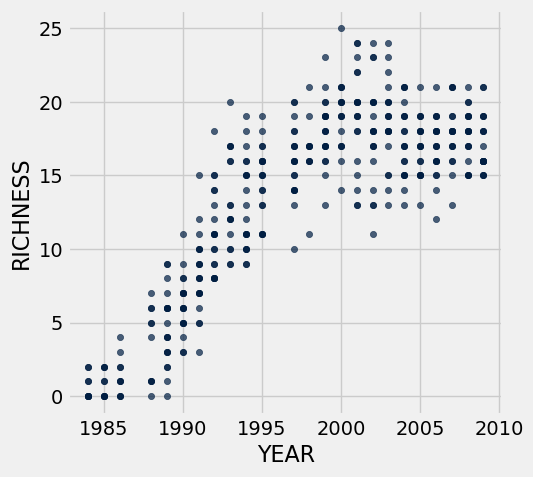

In [34]:
MSH_YEAR.where('PLOT_NAME','STRD').scatter("YEAR","RICHNESS")

In [35]:
MSH_YEAR.where('PLOT_NAME','STRD').group("YEAR",np.mean)

YEAR,PLOT_ID mean,PLOT_NAME mean,PLOT_NUMBER mean,RICHNESS mean,COVER_% mean,HPRIME mean,EVENNESS mean,FREQUENCY mean,PLOT_CODE mean
1984,,,5.5,0.6,0.06,0.1386,0.2,1.1,
1985,,,5.5,0.8,0.08,0.2079,0.3,0.85,
1986,,,5.5,1.4,0.28,0.3871,0.4,3.23,
1988,,,5.5,3.6,1.45,0.9923,0.5882,9.66,
1989,,,10.5,4.7,3.295,1.2956,0.82585,3.51,
1990,,,10.5,6.25,1.435,1.6168,0.919,3.605,
1991,,,10.5,8.3,3.11,1.79715,0.88635,3.87,
1992,,,10.5,11.15,4.71,2.0761,0.87865,4.43,
1993,,,8.5,13.375,6.40625,2.11463,0.830813,7.1,
1994,,,10.5,13.1,7.435,2.11255,0.83115,8.25,


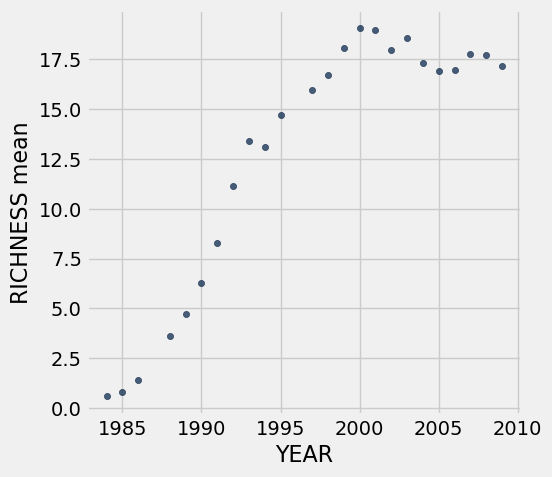

In [36]:
MSH_YEAR.where('PLOT_NAME','STRD').group("YEAR",np.mean).scatter("YEAR", "RICHNESS mean")

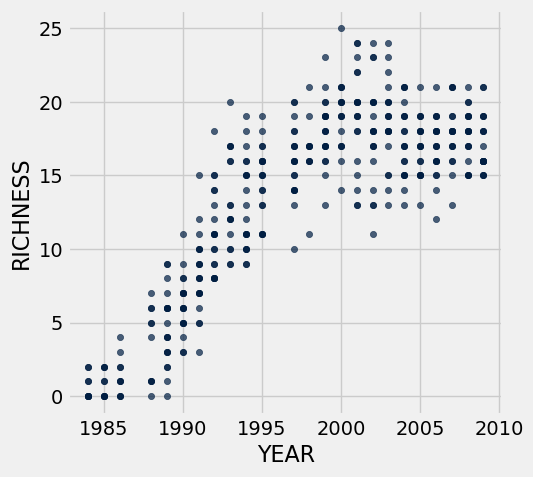

In [37]:
MSH_YEAR.where('PLOT_NAME','STRD').scatter('YEAR','RICHNESS')

In [38]:
def simulate_under_null(num_chances_to_change):
    uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
    sample = uniform.sample_from_distribution('Chance', num_chances_to_change)     
    increases = sample.column("Chance sample").item(0) 
    decreases = sample.column("Chance sample").item(1)  
    return increases - decreases  

In [39]:
def empirical_distribution(tbl,iterations):
    num_changes = tbl.num_rows 
    samples = make_array()
    for i in np.arange(iterations):
        samples = np.append(samples, simulate_under_null(num_changes)) 
    Table().with_column('Test statistic under null', samples).hist(bins=np.arange(min(samples), max(samples) + max(samples) , 2))
    return samples

array([ 0.,  0.,  2., ..., -8.,  0.,  4.])

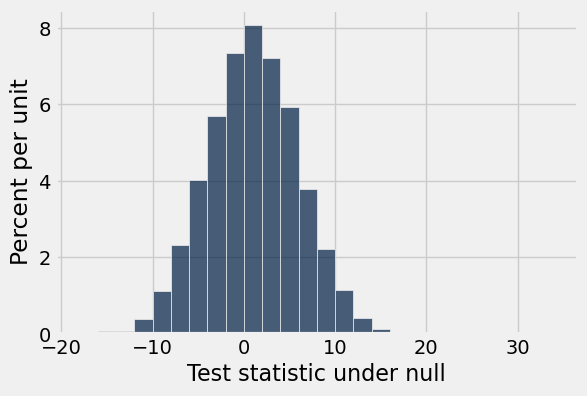

In [40]:
empirical_distribution(MSH_YEAR.where('PLOT_NAME','STRD').group("YEAR",np.mean),10000)

array([ 27.,  21.,   7., ...,  17.,   5., -39.])

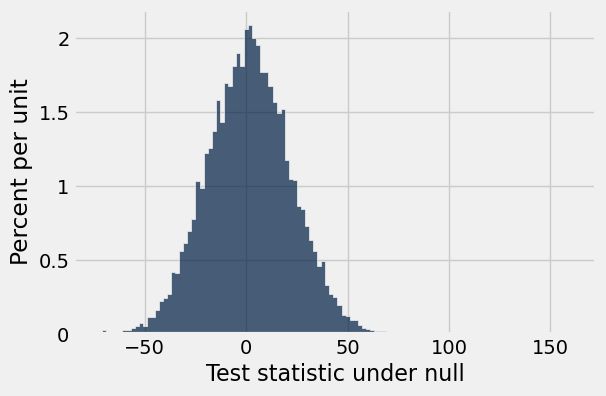

In [41]:
empirical_distribution(MSH_YEAR.where('PLOT_NAME','STRD'),10000)